<a href="https://colab.research.google.com/github/USIS015220/coolab/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USO de TENSORFLOW
HOLA MUNDO

In [ ]:
import tensorflow as tf 
resp = tf.add(3,8).numpy()
print(resp)

11


In [ ]:
#importaciones de librerias a utilizar
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


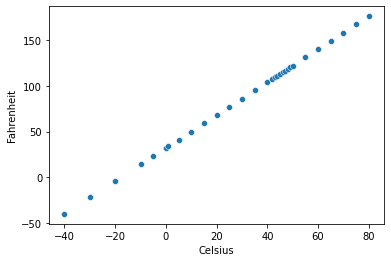

In [ ]:
#obtencion de los datos de entrenamiento
temperaturas = pd.read_csv("/content/dataset.csv", sep=";")

sns.scatterplot(temperaturas["Celsius"], temperaturas["Fahrenheit"])
plt.show()

In [ ]:
#datos de entrada y salida 
Celsius = temperaturas["Celsius"]
Fahrenheit = temperaturas['Fahrenheit']

In [ ]:
#modelo de entrenamiento
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
#compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1),loss='mean_squared_error')

In [ ]:
#entrenamiento del modelo
epocas = modelo.fit(Celsius, Fahrenheit, epochs=100)

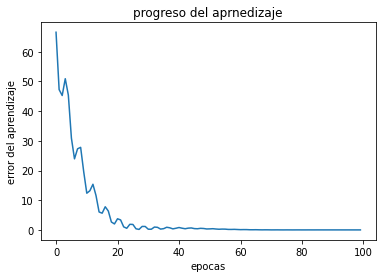

In [ ]:
#evaluando el nivel de error del aprendizaje
plt.plot(epocas.history["loss"])
plt.title("progreso del aprnedizaje")
plt.xlabel("epocas")
plt.ylabel("error del aprendizaje")
plt.show()

In [ ]:
#haciendo predicciones con el aprendizaje automatico 
f =modelo.predict([27])
print(f)

[[80.57678]]


ENTRENANDO UNA RED NEURONAL PARA QUE APRENDA A LEER NUMEROS DEL 0-9

In [21]:
#Importar LAS LIBRERIAS
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
import math
import tensorflow_datasets as tfds

In [22]:
#cargamos nuestro dataset en variables 
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [23]:
numeros_letras = ["Cero", "uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"
]

In [24]:
#pasar en variables los datos de entrenamiento y prueba
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [25]:
#funcion normalizadora de los pixels de 0 - 255 que sean de 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 225
  return images, labels

In [26]:
#llamamos la funcion normalizadora en ambos dataset 
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [27]:
#estructuramos nuestra red neuronal
modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entreda de 28*28 = 784 neuronas una para cada pixel
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 neuronas una para cada numero, 
        #funcion de activacion softmax. esta funcion es requerida para clasificacion
])

In [28]:
#Compilamos el modelo de red neuronal e indicamos las funciones a utilizar 
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [30]:
#Entrenamiento de lotes
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [33]:
#entrenamiento neutro modelo de datos
modelo.fit(datos_entrenamiento, epochs=5,
          steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 17s 4ms/step - loss: 0.2668 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1218 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0869 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0679 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0575 - accuracy: 0.9817


In [ ]:
#evaluar el modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test,accuracy)

In [38]:
#graficar la salida para evaluar los resultados
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, ing = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label =np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "blue"
  else:
    color = "red"
    plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)